### Image histograms with OpenCV
Let's create histograms for colors channels of an image 

In [1]:
# Import all the tools 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Recall that Matplotlib expects the images in a different RGB ordering vs BGR in OpenCV, so if we use OpenCV to calculate anything channel oriented, we'll want to make sure we keep the original RGB ordering, however if we ever want to display the image, then we'll need to convert to the RGB ordering that matplotlib wants.

In [7]:
# Import all the needed images
horse=cv2.imread("horse.jpg")
show_horse=cv2.cvtColor(horse,cv2.COLOR_BGR2RGB)

rainbow=cv2.imread("rainbow.jpg")
show_rainbow=cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

blue_bricks=cv2.imread("bricks.jpg")
show_blue_bricks=cv2.cvtColor(blue_bricks,cv2.COLOR_BGR2RGB)

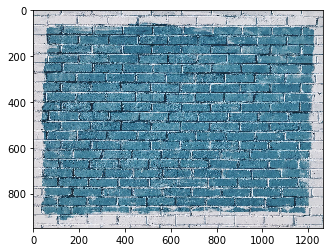

In [8]:
plt.imshow(show_blue_bricks)

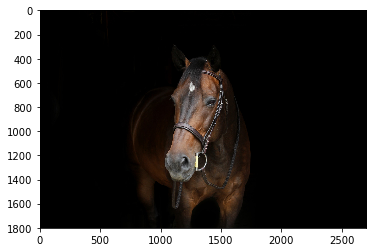

In [9]:
plt.imshow(show_horse)

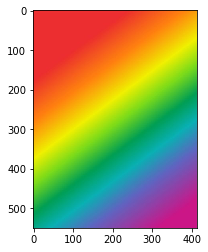

In [10]:
plt.imshow(show_rainbow)

### OpenCV Histogram
**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
* channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
* histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges : this is our RANGE. Normally, it is [0,256].

Text(0.5,1,'Histogram for red color channel')

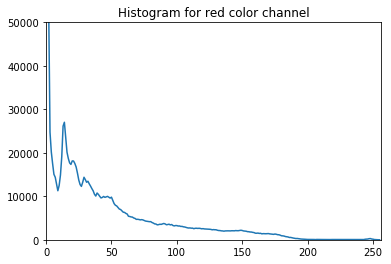

In [13]:
# Color channel histogram for horse image

hist_horse=cv2.calcHist([horse],channels=[2],mask=None,histSize=[256],ranges=[0,256])   # for color Red chanel
plt.plot(hist_horse)
plt.xlim([0,256])
plt.ylim([0,50000])
plt.title("Histogram for red color channel")

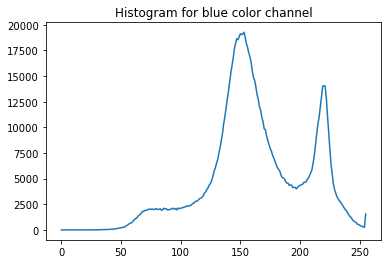

In [14]:
# For blue_bricks image
hist_blue=cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])  # for blue color channel
plt.plot(hist_blue)
plt.title("Histogram for blue color channel")
plt.show()
                        

### OpenCV Histogram for different color channels 

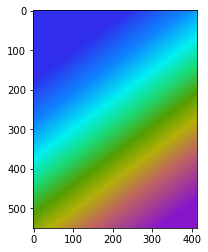

In [15]:
plt.imshow(rainbow)

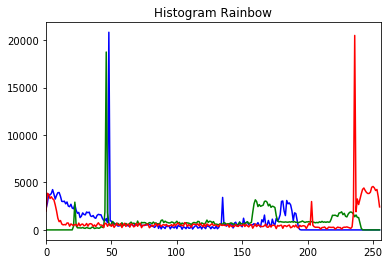

In [20]:
color=['b','g','r']

for i, col in enumerate(color):
    hist=cv2.calcHist([rainbow],channels=[i],mask=None,histSize=[256],ranges=[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])
plt.title("Histogram Rainbow")
plt.show;

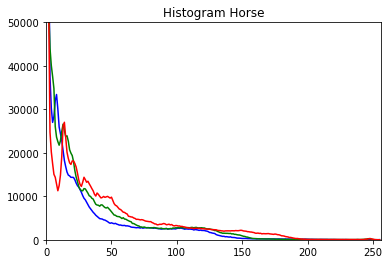

In [22]:
# Let's do it for horse image
color=["b","g","r"]
for i, col in enumerate(color):
    hist2=cv2.calcHist([horse],[i],None,[256],[0,256])
    plt.plot(hist2,color=col)
    plt.xlim([0,256])
    plt.ylim([0,50000])
plt.title("Histogram Horse")
plt.show();

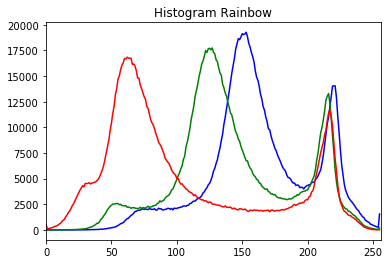

In [27]:
# Do it for rainbow image

color=('b','g','r')
for i, col in enumerate(color):
    hist3=cv2.calcHist([blue_bricks],[i],None,[256],[0,256])
    plt.plot(hist3,color=col)
    plt.xlim([0,256])
    
plt.title('Histogram Rainbow')
plt.show()

## Masking
We can mask only certain parts of the image

In [28]:
img=rainbow
img.shape

(550, 413, 3)

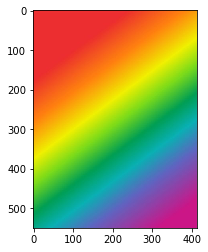

In [30]:
plt.imshow(show_rainbow)

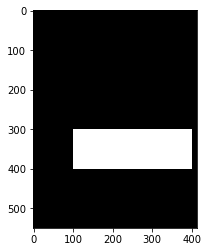

In [37]:
# Create a mask
mask=np.zeros(img.shape[:2],np.uint8)
mask[300:400,100:400]=255
plt.imshow(mask,cmap='gray')

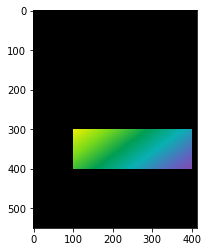

In [41]:
masked_img=cv2.bitwise_or(img,img,mask=mask)
show_masked_img=cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)
plt.imshow(show_masked_img)

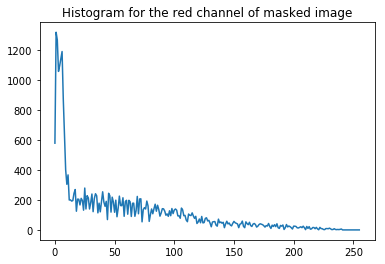

In [49]:
hist_masked=cv2.calcHist([img],[2],mask,[256],[0,256])
plt.plot(hist_masked)
plt.title("Histogram for the red channel of masked image");


Text(0.5,1,'Histogram for the red channel of full image')

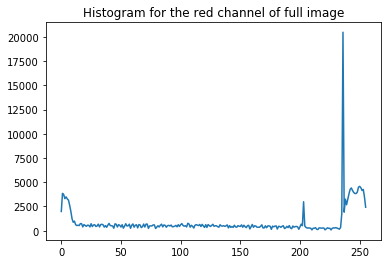

In [52]:
hist_full_image=cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(hist_full_image)
plt.title("Histogram for the red channel of full image")

## Histogram Equalization

Histogram equalization is a method to process images in order to adjust the contrast of an image by modifying the intensity distribution of the histogram. The objective of this technique is to give a linear trend to the cumulative probability function associated to the image.

In [55]:
# import the gorilla image and convert this image to rgb color channel and hsv color channel

gorilla=cv2.imread("gorilla.jpg")
rgb_img=cv2.cvtColor(gorilla,cv2.COLOR_BGR2RGB)
hsv_img=cv2.cvtColor(gorilla,cv2.COLOR_BGR2HSV)

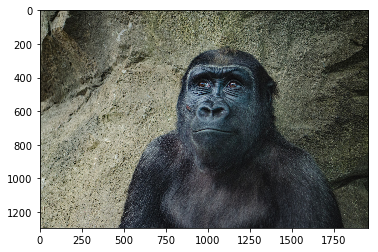

In [56]:
plt.imshow(rgb_img)

In [58]:
def display_img(img,cmap=None):
    fig=plt.figure(figsize=(10,15))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap)

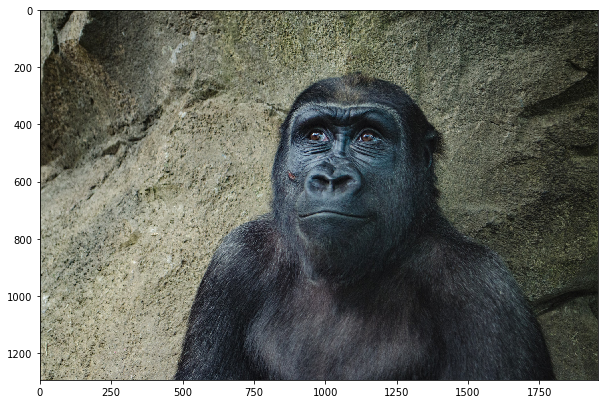

In [59]:
display_img(rgb_img)

### Histogram Equalization for Single Channel (Gray Scale) 

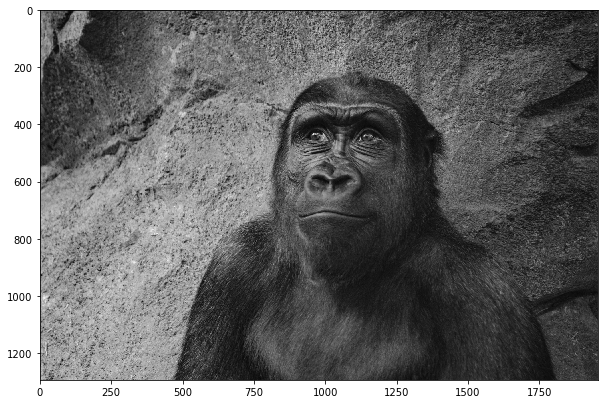

In [60]:
single_gol=cv2.imread("gorilla.jpg",0)
display_img(single_gol,cmap='gray')

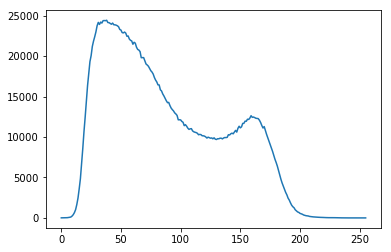

In [61]:
hist_img=cv2.calcHist([single_gol],[0],None,[256],[0,256])
plt.plot(hist_img)

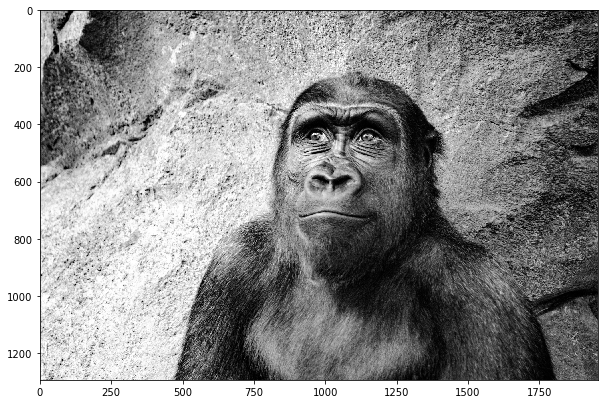

In [63]:
# Equalized image
equal_img=cv2.equalizeHist(single_gol)
display_img(equal_img,cmap='gray')

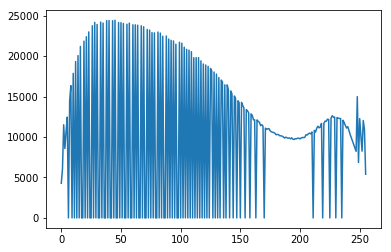

In [64]:
equal_hist=cv2.calcHist([equal_img],[0],None,[256],[0,256])
plt.plot(equal_hist);

### Equalized Histogram for Colored Image

In [65]:
color_gol=gorilla

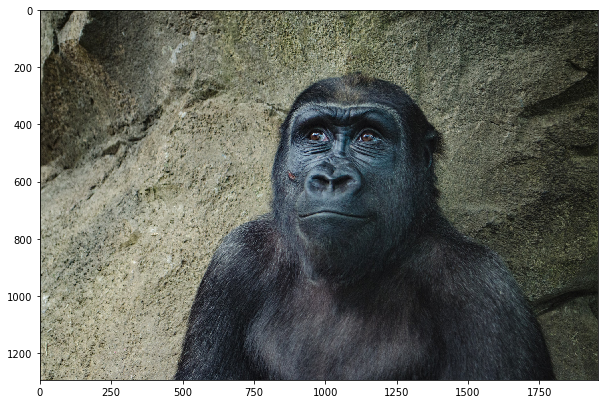

In [68]:
display_img(rbg_img)

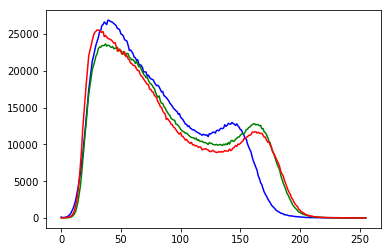

In [69]:
color=('b','g','r')
for i, col in enumerate(color):
    
    hist1=cv2.calcHist([color_gol],[i],None,[256],[0,256])
    plt.plot(hist1,color=col)
plt.show();

In [71]:
# Equalized Image  ( Import hsv Image of the gorilla)
hsv_img.shape

(1295, 1955, 3)

In [72]:
hsv_img[:,:,2]   # Value of the image

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 197, 184, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [173, 170, 173, ...,  49,  50,  50]], dtype=uint8)

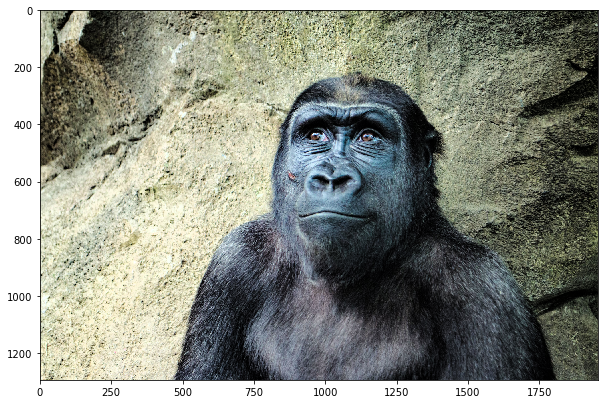

In [76]:
hsv_img[:,:,2]=cv2.equalizeHist(hsv_img[:,:,2])

# Now convert back the image to rgb channel to display image
equal_img_gol=cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB)
display_img(equal_img_gol)

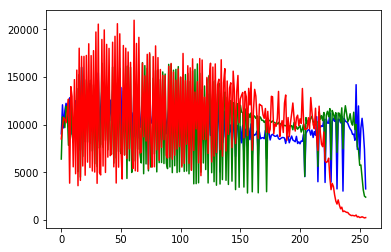

In [77]:
color=('b','g','r')
for i, col in enumerate(color):
    
    hist1=cv2.calcHist([equal_img_gol],[i],None,[256],[0,256])
    plt.plot(hist1,color=col)
plt.show();